In [1]:
# for data transformation
import numpy as np
import pandas as pd
# for visualizing the data
import matplotlib.pyplot as plt
# for opening the media file
import scipy.io.wavfile as wavfile
import wave
from sklearn.model_selection import train_test_split
# from pyAudioAnalysis import audioTrainTest as aT

from IPython.display import Audio as ipd

import librosa
import librosa.display


# gather software versions

import keras


In [2]:
# IMPORT DATA
name_wav = []
file_excel = "dataset/dataset_abnormal.csv"

df = pd.read_csv(file_excel)

for i in range(len(df)):
    name_wav.append(df["Data"][i]+".wav")
df['file_wav'] = name_wav
df

,Data,Column2,Label,file_wav
0,a0001,1,abnormal,a0001.wav
1,a0002,1,abnormal,a0002.wav
2,a0003,1,abnormal,a0003.wav
3,a0004,1,abnormal,a0004.wav
4,a0005,1,abnormal,a0005.wav
...,...,...,...,...
404,a0405,-1,normal,a0405.wav
405,a0406,-1,normal,a0406.wav
406,a0407,-1,normal,a0407.wav
407,a0408,-1,normal,a0408.wav


In [3]:
total_normal =0
total_abnormal =0
for i in df['Label']:
    if i == "normal":
        total_normal=total_normal+1 
    else:
        total_abnormal=total_abnormal+1

print("Banyak data normal: ", total_normal)
print("Banyak data normal: ", total_abnormal)

Banyak data normal:  117
Banyak data normal:  292


# VISUALIZE

## normal data

In [4]:
#bunyi suara detak jantung normal
normal_file ="dataset/training-a/wav/"+str(df['file_wav'][408])
ipd(normal_file)

In [5]:
wav_normal = wave.open(normal_file)
print("Sampling (frame) rate = ", wav_normal.getframerate())
print("Total samples (frames) = ", wav_normal.getnframes())
print("Duration = ", wav_normal.getnframes()/wav_normal.getframerate())

Sampling (frame) rate =  2000
Total samples (frames) =  61440
Duration =  30.72


In [6]:
# Load use scipy
from scipy.io import wavfile
normal_rate, data_normal = wavfile.read(normal_file)
print("Sampling (frame) normal_rate = ", normal_rate)
print("Total samples (frames) = ", data_normal.shape)
print(data_normal)

Sampling (frame) normal_rate =  2000
Total samples (frames) =  (61440,)
[-1003 -2023 -1708 ... -1344 -1341 -1639]


In [7]:
rate_normal, normal_data = wavfile.read(normal_file)
print("Sampling (frame) rate normal = ", rate_normal)
print("Total samples (frames) = ", normal_data.shape)
print(normal_data)

Sampling (frame) rate normal =  2000
Total samples (frames) =  (61440,)
[-1003 -2023 -1708 ... -1344 -1341 -1639]


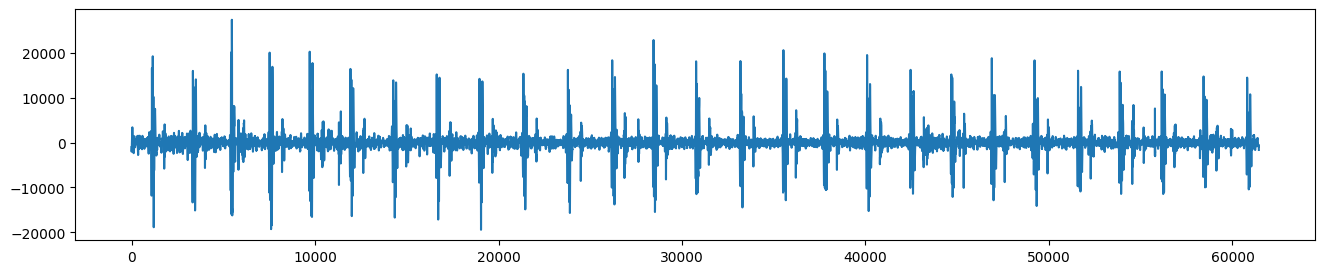

In [8]:
# plot wave by audio frames
plt.figure(figsize=(16, 3))
plt.plot(normal_data, '-', )

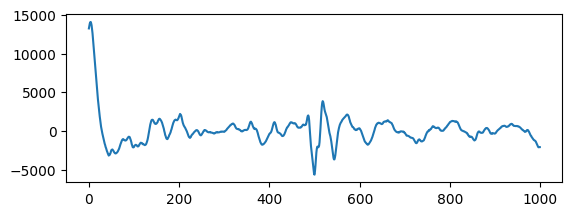

In [9]:
plt.subplot(2,1,2)
plt.plot(normal_data[3500:4500])

In [10]:
sample_rate = 3500


y_normal, sr_normal = librosa.load(normal_file)
dur_normal = librosa.get_duration(y=y_normal, sr=sr_normal)
len_normal = (len(normal_file))/sample_rate

mfccs_normal = librosa.feature.mfcc(y=y_normal, sr=sr_normal)

print("Duration normal Heart Rate: ", dur_normal)
print("lenght normal Heart Rate: ", len_normal)

print("MFC FEATURES")
print(mfccs_normal)

Duration normal Heart Rate:  30.72
lenght normal Heart Rate:  0.009142857142857144
MFC FEATURES
[[-3.6199817e+02 -4.0791089e+02 -4.6387448e+02 ... -4.7108270e+02
  -4.2918713e+02 -4.0464215e+02]
 [ 1.3202686e+02  1.1298586e+02  6.1993690e+01 ...  5.2286877e+01
   1.0178134e+02  1.2669387e+02]
 [ 3.4862339e+01  5.2772869e+01  4.7999245e+01 ...  3.9561752e+01
   6.5499680e+01  7.0203629e+01]
 ...
 [ 5.4677906e+00  7.6149244e+00  8.3432770e+00 ...  6.5417995e+00
   2.2483215e+00  6.4678156e-01]
 [ 3.9628425e+00  5.2620225e+00  4.5938778e+00 ...  4.9711366e+00
   1.2129276e+00 -4.1501626e-01]
 [ 3.0085907e+00  3.9241717e+00  8.2530868e-01 ...  4.6719303e+00
   2.1573281e+00  9.5276284e-01]]


In [11]:
S_normal= librosa.feature.melspectrogram(y=y_normal, sr=sr_normal, n_mels=128,fmax=8000)
log_S_normal=librosa.feature.mfcc(S=librosa.power_to_db(S_normal))
print (log_S_normal)

[[-3.4528665e+02 -3.9411829e+02 -4.5236829e+02 ... -4.6044693e+02
  -4.1520172e+02 -3.8878659e+02]
 [ 1.3001335e+02  1.1452693e+02  6.3912025e+01 ...  5.3215076e+01
   1.0488312e+02  1.3026889e+02]
 [ 3.1502628e+01  4.9718365e+01  4.7534210e+01 ...  3.8686661e+01
   6.1682281e+01  6.3879494e+01]
 ...
 [ 3.5652385e+00  4.5041718e+00  2.1117096e+00 ...  4.9058123e+00
   2.0283227e+00  3.1209585e-01]
 [ 3.5614691e+00  4.4661131e+00 -5.2830476e-01 ...  5.8197889e+00
   4.4393220e+00  3.0692666e+00]
 [ 4.8537207e+00  6.1647878e+00  3.3459598e-01 ...  6.8050985e+00
   6.1349907e+00  4.7722564e+00]]


In [12]:
# Get more components
mfccs_normal = librosa.feature.mfcc(y=y_normal, sr=sr_normal, n_mfcc=40)
print (mfccs_normal)

[[-3.6199817e+02 -4.0791089e+02 -4.6387448e+02 ... -4.7108270e+02
  -4.2918713e+02 -4.0464215e+02]
 [ 1.3202686e+02  1.1298586e+02  6.1993690e+01 ...  5.2286877e+01
   1.0178134e+02  1.2669387e+02]
 [ 3.4862339e+01  5.2772869e+01  4.7999245e+01 ...  3.9561752e+01
   6.5499680e+01  7.0203629e+01]
 ...
 [ 2.0081463e+00  2.9067769e+00  6.8150215e+00 ...  7.1923947e-01
   2.7642465e+00  2.1096692e+00]
 [ 1.5688794e+00  2.1943076e+00  7.1728964e+00 ... -3.4630829e-01
   1.6126517e+00  1.2572253e+00]
 [ 1.0077624e+00  1.3687893e+00  5.4062490e+00 ... -2.8826615e-01
   1.0785377e+00  5.5613118e-01]]


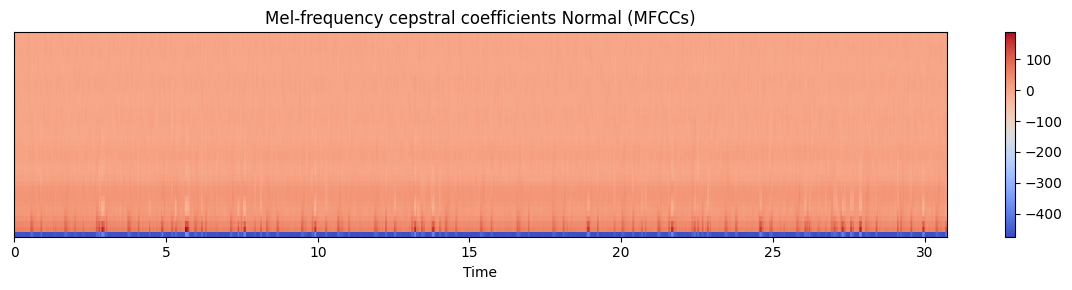

In [13]:
# Visualize the MFCC series
# Mel-frequency cepstral coefficients (MFCCs)
plt.figure(figsize=(12, 3))
librosa.display.specshow(mfccs_normal, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients Normal (MFCCs)')
plt.tight_layout()

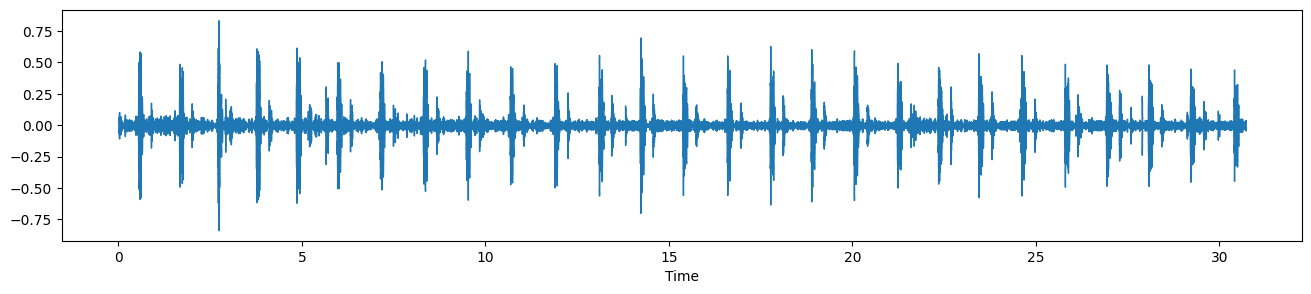

In [14]:
# librosa plot
plt.figure(figsize=(16, 3))
librosa.display.waveshow(y_normal, sr=sr_normal)


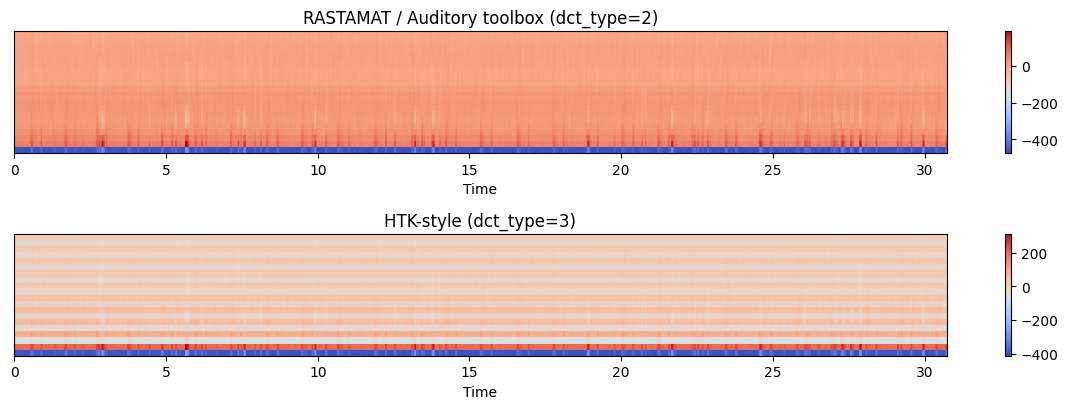

In [15]:
# Compare different DCT bases
m_slaney_normal = librosa.feature.mfcc(y=y_normal, sr=sr_normal, dct_type=2)

#m_dct1 = librosa.feature.mfcc(y=y, sr=sr, dct_type=1)
plt.figure(figsize=(12, 6))
#plt.subplot(3, 1, 1)
#librosa.display.specshow(m_dct1, x_axis='time')
#plt.title('Discrete cosine transform (dct_type=1)')
#plt.colorbar()
m_htk_normal = librosa.feature.mfcc(y=y_normal, sr=sr_normal, dct_type=3)
plt.subplot(3, 1, 2)
librosa.display.specshow(m_slaney_normal, x_axis='time')
plt.title('RASTAMAT / Auditory toolbox (dct_type=2)')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(m_htk_normal, x_axis='time')
plt.title('HTK-style (dct_type=3)')
plt.colorbar()
plt.tight_layout()

In [16]:
# Get onset times from a signal
onset_frames_normal = librosa.onset.onset_detect(y=y_normal, sr=sr_normal)
librosa.frames_to_time(onset_frames_normal, sr=sr_normal)

array([ 0.58049887,  0.90557823,  1.39319728,  1.69505669,  2.02013605,
        2.32199546,  2.73995465,  2.83283447,  2.92571429,  3.06503401,
        3.78485261,  4.13315193,  4.48145125,  4.73687075,  4.87619048,
        4.92263039,  5.2244898 ,  5.34058957,  5.66566893,  5.9907483 ,
        6.19972789,  6.33904762,  6.68734694,  7.15174603,  7.40716553,
        7.59292517,  7.96444444,  8.15020408,  8.33596372,  8.68426304,
        9.49696145,  9.63628118,  9.86848073,  9.93814059, 10.30965986,
       10.70439909, 10.84371882, 11.05269841, 11.91183673, 12.26013605,
       12.56199546, 13.11927438, 13.23537415, 13.44435374, 13.53723356,
       13.79265306, 13.83909297, 14.04807256, 14.25705215, 14.58213152,
       15.41804989, 15.74312925, 16.62548753, 16.97378685, 17.78648526,
       18.11156463, 18.25088435, 18.90104308, 18.94748299, 19.2493424 ,
       19.78340136, 20.06204082, 20.41034014, 20.71219955, 20.82829932,
       21.2462585 , 21.61777778, 21.68743764, 22.36081633, 22.45

In [17]:
# use a pre-computed onset envelope
o_env_normal = librosa.onset.onset_strength(y=y_normal, sr=sr_normal)
times_normal = librosa.frames_to_time(np.arange(len(o_env_normal)), sr=sr_normal)
onset_frames_normal = librosa.onset.onset_detect(onset_envelope=o_env_normal, sr=sr_normal)

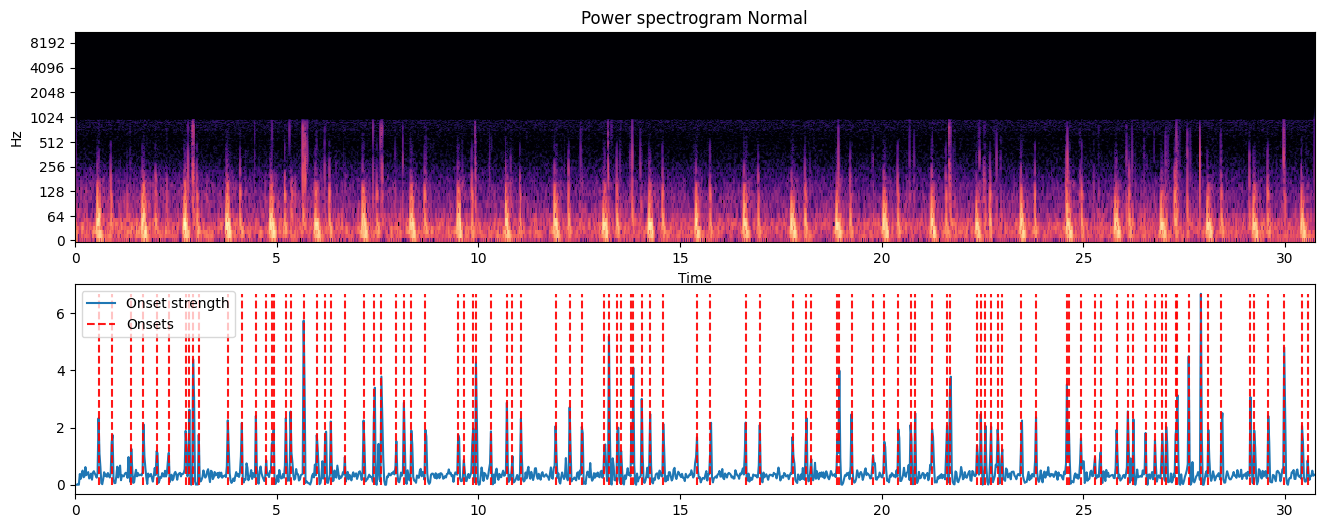

In [18]:
# visualize it
D_normal = np.abs(librosa.stft(y_normal))
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D_normal, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram Normal')
plt.subplot(2, 1, 2, sharex=ax1)

plt.plot(times_normal, o_env_normal, label='Onset strength')
plt.vlines(times_normal[onset_frames_normal], 0, o_env_normal.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

onset_backtrack

Backtrack detected onset events to the nearest preceding local minimum of an energy function. This function can be used to roll back the timing of detected onsets from a detected peak amplitude to the preceding minimum. This is most useful when using onsets to determine slice points for segmentation

In [19]:
oenv_normal = librosa.onset.onset_strength(y=y_normal, sr=sr_normal)
# Detect events without backtracking
onset_raw_normal = librosa.onset.onset_detect(onset_envelope=oenv_normal, backtrack=False)
# Backtrack the events using the onset envelope
onset_bt_normal = librosa.onset.onset_backtrack(onset_raw_normal, oenv_normal)
# Backtrack the events using the RMS values
rms_normal = librosa.feature.rms(S=np.abs(librosa.stft(y=y_normal)))
onset_bt_normal_rms = librosa.onset.onset_backtrack(onset_raw_normal, rms_normal[0])

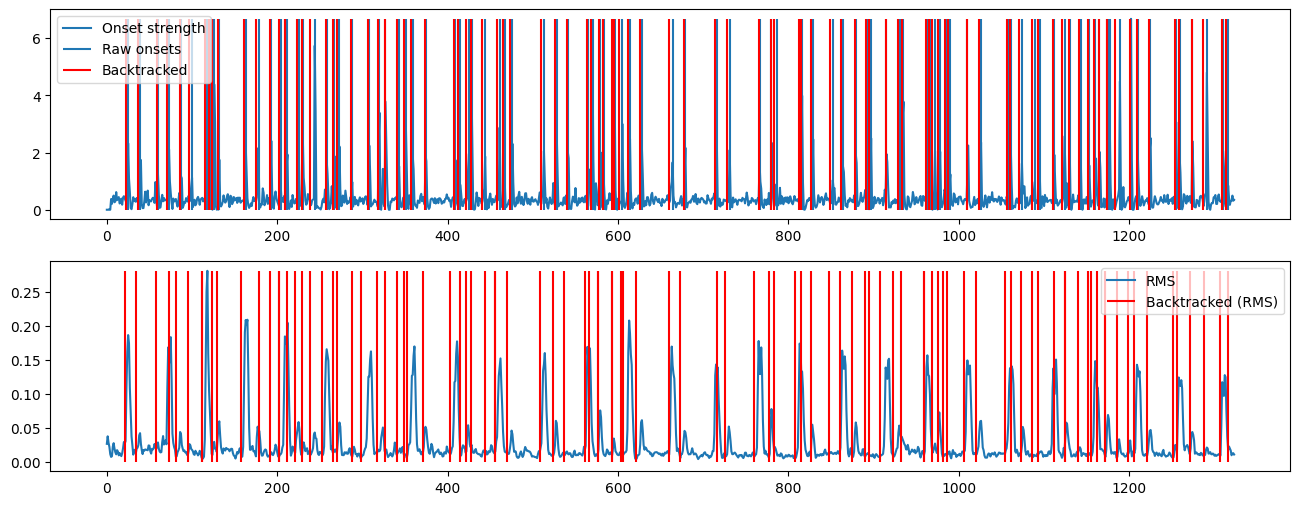

In [20]:
# Plot the results
plt.figure(figsize=(16, 6))
plt.subplot(2,1,1)
plt.plot(oenv_normal, label='Onset strength')
plt.vlines(onset_raw_normal, 0, oenv_normal.max(), label='Raw onsets')
plt.vlines(onset_bt_normal, 0, oenv_normal.max(), label='Backtracked', color='r')
plt.legend(frameon=True, framealpha=0.75)
plt.subplot(2,1,2)
plt.plot(rms_normal[0], label='RMS')
plt.vlines(onset_bt_normal_rms, 0, rms_normal.max(), label='Backtracked (RMS)', color='r')
plt.legend(frameon=True, framealpha=0.75)

onset strength

Compute a spectral flux onset strength envelope. Onset strength at time t is determined by: mean_f max(0, S[f, t] - ref_S[f, t - lag]) where ref_S is S after local max filtering along the frequency axis [1]. By default, if a time series y is provided, S will be the log-power Mel spectrogram.

C:\Users\dianr\AppData\Local\Temp\ipykernel_39268\2110817198.py:16: RuntimeWarning: invalid value encountered in divide
  plt.plot(times_normal, 1+ (onset_env_normal/onset_env_normal.max()), alpha=0.8,label='Median (custom mel)')


Text(0.5, 1.0, 'Sub-band onset strength')

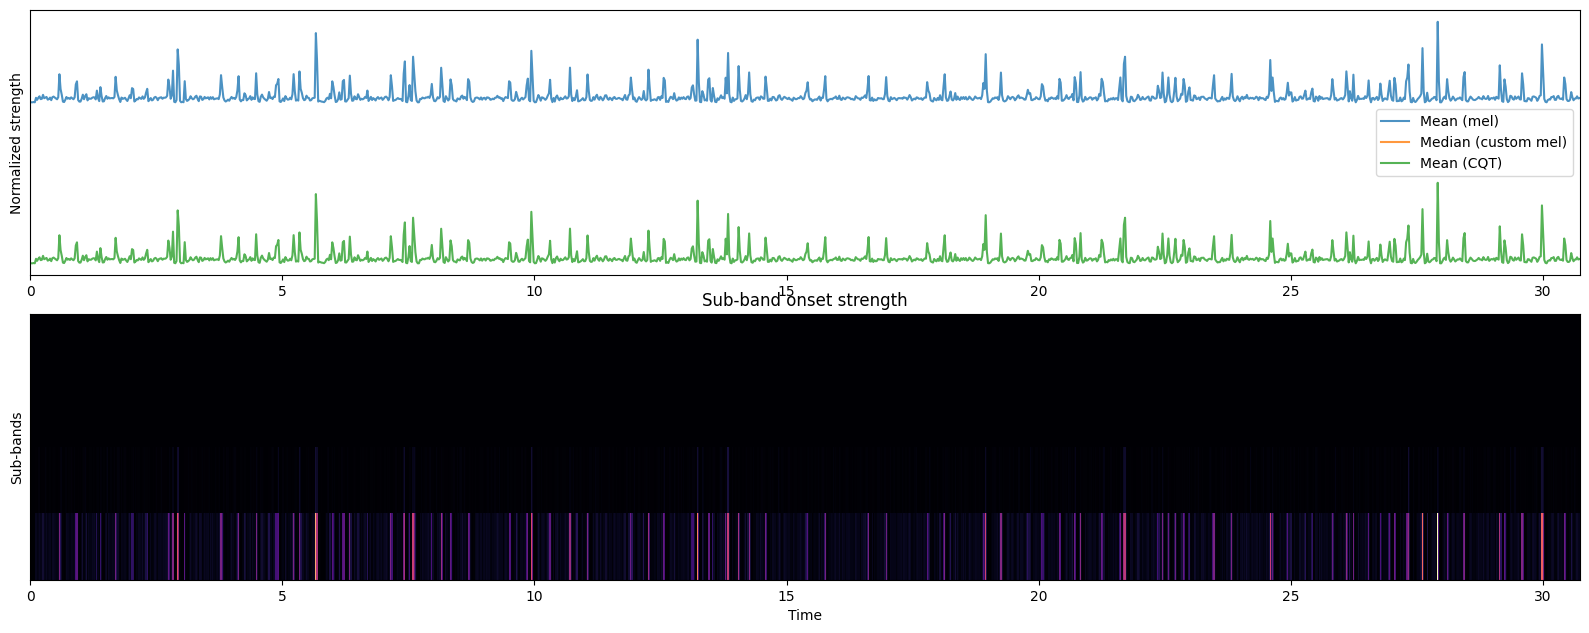

In [21]:
D_normal = np.abs(librosa.stft(y_normal))
times_normal = librosa.frames_to_time(np.arange(D_normal.shape[1]))

plt.figure(figsize=(16, 6))
#ax1 = plt.subplot(2, 1, 1)
#librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),y_axis='log', x_axis='time')
#plt.title('Power spectrogram')

# Construct a standard onset function
onset_env_normal = librosa.onset.onset_strength(y=y_normal, sr=sr_normal)
plt.subplot(2, 1, 1, sharex=ax1)
plt.plot(times_normal, 2 + onset_env_normal / onset_env_normal.max(), alpha=0.8,label='Mean (mel)')

# median
onset_env_normal = librosa.onset.onset_strength(y=y_normal, sr=sr_normal, aggregate=np.median,fmax=8000, n_mels=256)
plt.plot(times_normal, 1+ (onset_env_normal/onset_env_normal.max()), alpha=0.8,label='Median (custom mel)')

# Constant-Q spectrogram instead of Mel
onset_env_normal = librosa.onset.onset_strength(y=y_normal, sr=sr_normal)
plt.plot(times_normal, onset_env_normal / onset_env_normal.max(), alpha=0.8,label='Mean (CQT)')
plt.legend(frameon=True, framealpha=0.75)
plt.ylabel('Normalized strength')
plt.yticks([])
plt.axis('tight')
plt.tight_layout()

onset_subbands_normal = librosa.onset.onset_strength_multi(y=y_normal, sr=sr_normal, channels=[0, 32, 64, 96, 128])
#plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 2)
librosa.display.specshow(onset_subbands_normal, x_axis='time')
plt.ylabel('Sub-bands')
plt.title('Sub-band onset strength')

## abnormal data

In [22]:
#bunyi suara detak jantung normal
abnormal_file ="dataset/training-a/wav/"+str(df['file_wav'][1])
ipd(abnormal_file)

In [23]:
wav_abnormal = wave.open(abnormal_file)
print("Sampling (frame) rate = ", wav_abnormal.getframerate())
print("Total samples (frames) = ", wav_abnormal.getnframes())
print("Duration = ", wav_abnormal.getnframes()/wav_abnormal.getframerate())

Sampling (frame) rate =  2000
Total samples (frames) =  41657
Duration =  20.8285


In [24]:
# Load use scipy
from scipy.io import wavfile
rate_abnormal, data_abnormal = wavfile.read(abnormal_file)
print("Sampling (frame) rate = ", rate_abnormal)
print("Total samples (frames) = ", data_abnormal.shape)
print(data_abnormal)

Sampling (frame) rate =  2000
Total samples (frames) =  (41657,)
[297 728 779 ... -91 -81 -66]


In [25]:
rate_abnormal, abnormal_data = wavfile.read(abnormal_file)
print("Sampling (frame) rate = ", rate_abnormal)
print("Total samples (frames) = ", abnormal_data.shape)
print(abnormal_data)

Sampling (frame) rate =  2000
Total samples (frames) =  (41657,)
[297 728 779 ... -91 -81 -66]


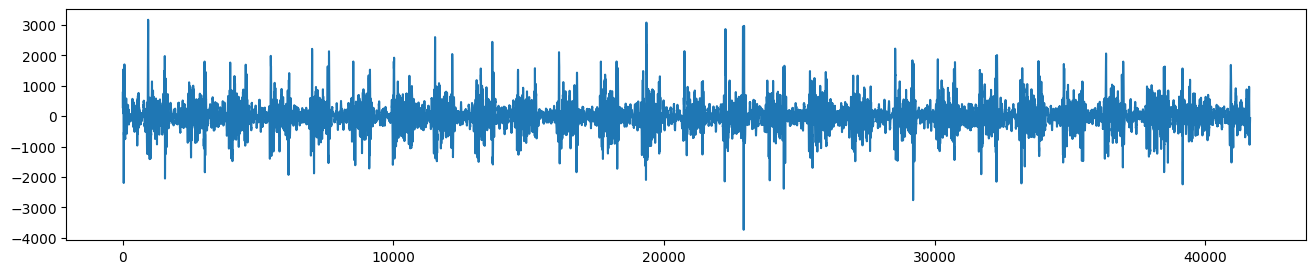

In [26]:
# plot wave by audio frames
# plt.subplot(4,2,4)
plt.figure(figsize=(16, 3))
plt.plot(abnormal_data, '-', )

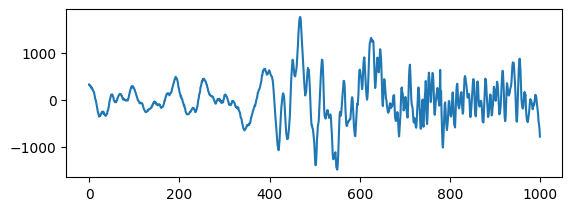

In [27]:
plt.subplot(2,1,2)
plt.plot(abnormal_data[3500:4500])

In [28]:
sample_rate = 3500


y_abnormal, sr_abnormal = librosa.load(normal_file)
dur_abnormal = librosa.get_duration(y=y_abnormal, sr=sr_abnormal)
len_abnormal = (len(normal_file))/sample_rate

mfccs_abnormal = librosa.feature.mfcc(y=y_abnormal, sr=sr_abnormal)

print("Duration normal Heart Rate: ", dur_abnormal)
print("lenght normal Heart Rate: ", len_abnormal)

print("MFC FEATURES")
print(mfccs_abnormal)

Duration normal Heart Rate:  30.72
lenght normal Heart Rate:  0.009142857142857144
MFC FEATURES
[[-3.6199817e+02 -4.0791089e+02 -4.6387448e+02 ... -4.7108270e+02
  -4.2918713e+02 -4.0464215e+02]
 [ 1.3202686e+02  1.1298586e+02  6.1993690e+01 ...  5.2286877e+01
   1.0178134e+02  1.2669387e+02]
 [ 3.4862339e+01  5.2772869e+01  4.7999245e+01 ...  3.9561752e+01
   6.5499680e+01  7.0203629e+01]
 ...
 [ 5.4677906e+00  7.6149244e+00  8.3432770e+00 ...  6.5417995e+00
   2.2483215e+00  6.4678156e-01]
 [ 3.9628425e+00  5.2620225e+00  4.5938778e+00 ...  4.9711366e+00
   1.2129276e+00 -4.1501626e-01]
 [ 3.0085907e+00  3.9241717e+00  8.2530868e-01 ...  4.6719303e+00
   2.1573281e+00  9.5276284e-01]]


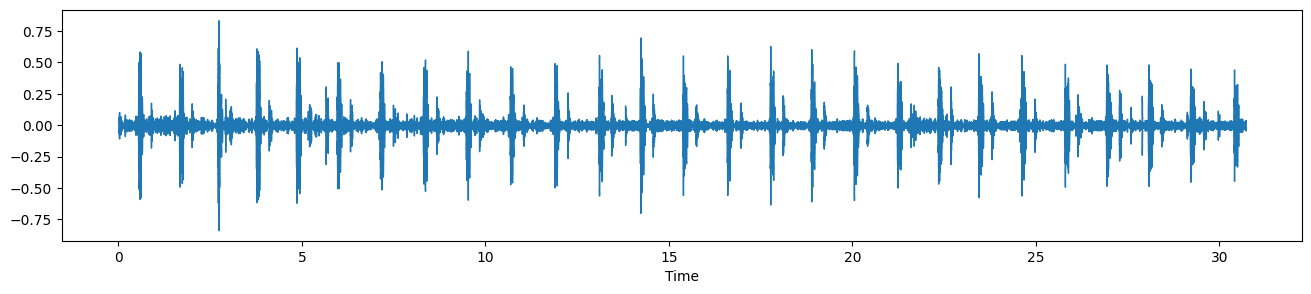

In [29]:
# librosa plot
# plt.subplot(4,2,4)
plt.figure(figsize=(16, 3))
librosa.display.waveshow(y_abnormal, sr=sr_abnormal)

In [30]:
S_abnormal= librosa.feature.melspectrogram(y=y_normal, sr=sr_normal, n_mels=128,fmax=8000)
log_S_abnormal=librosa.feature.mfcc(S=librosa.power_to_db(S_abnormal))
print (log_S_abnormal)

[[-3.4528665e+02 -3.9411829e+02 -4.5236829e+02 ... -4.6044693e+02
  -4.1520172e+02 -3.8878659e+02]
 [ 1.3001335e+02  1.1452693e+02  6.3912025e+01 ...  5.3215076e+01
   1.0488312e+02  1.3026889e+02]
 [ 3.1502628e+01  4.9718365e+01  4.7534210e+01 ...  3.8686661e+01
   6.1682281e+01  6.3879494e+01]
 ...
 [ 3.5652385e+00  4.5041718e+00  2.1117096e+00 ...  4.9058123e+00
   2.0283227e+00  3.1209585e-01]
 [ 3.5614691e+00  4.4661131e+00 -5.2830476e-01 ...  5.8197889e+00
   4.4393220e+00  3.0692666e+00]
 [ 4.8537207e+00  6.1647878e+00  3.3459598e-01 ...  6.8050985e+00
   6.1349907e+00  4.7722564e+00]]


In [31]:
# Get more components
mfccs_abnormal = librosa.feature.mfcc(y=y_abnormal, sr=sr_abnormal, n_mfcc=40)
print (mfccs_abnormal)

[[-3.6199817e+02 -4.0791089e+02 -4.6387448e+02 ... -4.7108270e+02
  -4.2918713e+02 -4.0464215e+02]
 [ 1.3202686e+02  1.1298586e+02  6.1993690e+01 ...  5.2286877e+01
   1.0178134e+02  1.2669387e+02]
 [ 3.4862339e+01  5.2772869e+01  4.7999245e+01 ...  3.9561752e+01
   6.5499680e+01  7.0203629e+01]
 ...
 [ 2.0081463e+00  2.9067769e+00  6.8150215e+00 ...  7.1923947e-01
   2.7642465e+00  2.1096692e+00]
 [ 1.5688794e+00  2.1943076e+00  7.1728964e+00 ... -3.4630829e-01
   1.6126517e+00  1.2572253e+00]
 [ 1.0077624e+00  1.3687893e+00  5.4062490e+00 ... -2.8826615e-01
   1.0785377e+00  5.5613118e-01]]


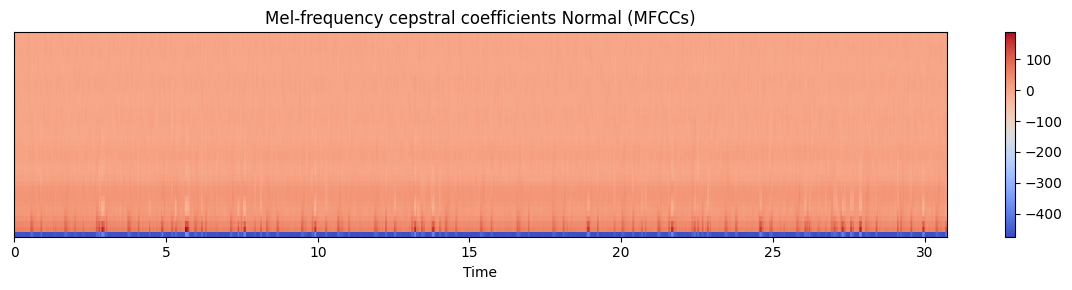

In [32]:
# Visualize the MFCC series
# Mel-frequency cepstral coefficients (MFCCs)
plt.figure(figsize=(12, 3))
librosa.display.specshow(mfccs_abnormal, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients Normal (MFCCs)')
plt.tight_layout()

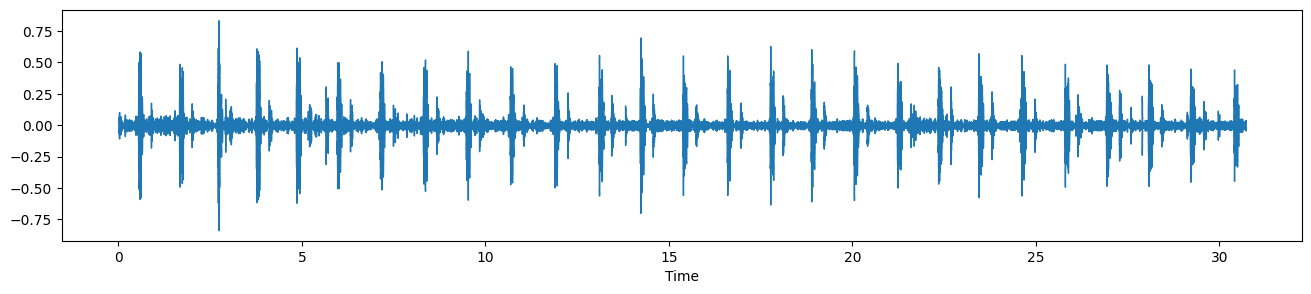

In [33]:
# librosa plot
plt.figure(figsize=(16, 3))
librosa.display.waveshow(y_abnormal, sr=sr_abnormal)


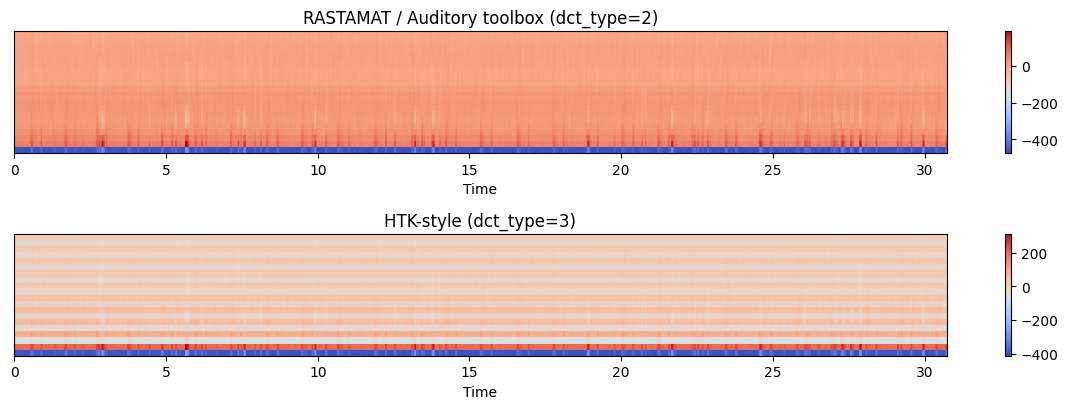

In [34]:
# Compare different DCT bases
m_slaney_abnormal = librosa.feature.mfcc(y=y_abnormal, sr=sr_abnormal, dct_type=2)

#m_dct1 = librosa.feature.mfcc(y=y, sr=sr, dct_type=1)
plt.figure(figsize=(12, 6))
#plt.subplot(3, 1, 1)
#librosa.display.specshow(m_dct1, x_axis='time')
#plt.title('Discrete cosine transform (dct_type=1)')
#plt.colorbar()
m_htk_abnormal = librosa.feature.mfcc(y=y_abnormal, sr=sr_abnormal, dct_type=3)
plt.subplot(3, 1, 2)
librosa.display.specshow(m_slaney_abnormal, x_axis='time')
plt.title('RASTAMAT / Auditory toolbox (dct_type=2)')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(m_htk_abnormal, x_axis='time')
plt.title('HTK-style (dct_type=3)')
plt.colorbar()
plt.tight_layout()

In [35]:
# Get onset times from a signal
onset_frames_abnormal = librosa.onset.onset_detect(y=y_abnormal, sr=sr_abnormal)
librosa.frames_to_time(onset_frames_abnormal, sr=sr_abnormal)

array([ 0.58049887,  0.90557823,  1.39319728,  1.69505669,  2.02013605,
        2.32199546,  2.73995465,  2.83283447,  2.92571429,  3.06503401,
        3.78485261,  4.13315193,  4.48145125,  4.73687075,  4.87619048,
        4.92263039,  5.2244898 ,  5.34058957,  5.66566893,  5.9907483 ,
        6.19972789,  6.33904762,  6.68734694,  7.15174603,  7.40716553,
        7.59292517,  7.96444444,  8.15020408,  8.33596372,  8.68426304,
        9.49696145,  9.63628118,  9.86848073,  9.93814059, 10.30965986,
       10.70439909, 10.84371882, 11.05269841, 11.91183673, 12.26013605,
       12.56199546, 13.11927438, 13.23537415, 13.44435374, 13.53723356,
       13.79265306, 13.83909297, 14.04807256, 14.25705215, 14.58213152,
       15.41804989, 15.74312925, 16.62548753, 16.97378685, 17.78648526,
       18.11156463, 18.25088435, 18.90104308, 18.94748299, 19.2493424 ,
       19.78340136, 20.06204082, 20.41034014, 20.71219955, 20.82829932,
       21.2462585 , 21.61777778, 21.68743764, 22.36081633, 22.45

In [36]:
# use a pre-computed onset envelope
o_env_abnormal = librosa.onset.onset_strength(y=y_abnormal, sr=sr_abnormal)
times_abnormal = librosa.frames_to_time(np.arange(len(o_env_abnormal)), sr=sr_abnormal)
onset_frames_abnormal = librosa.onset.onset_detect(onset_envelope=o_env_abnormal, sr=sr_abnormal)

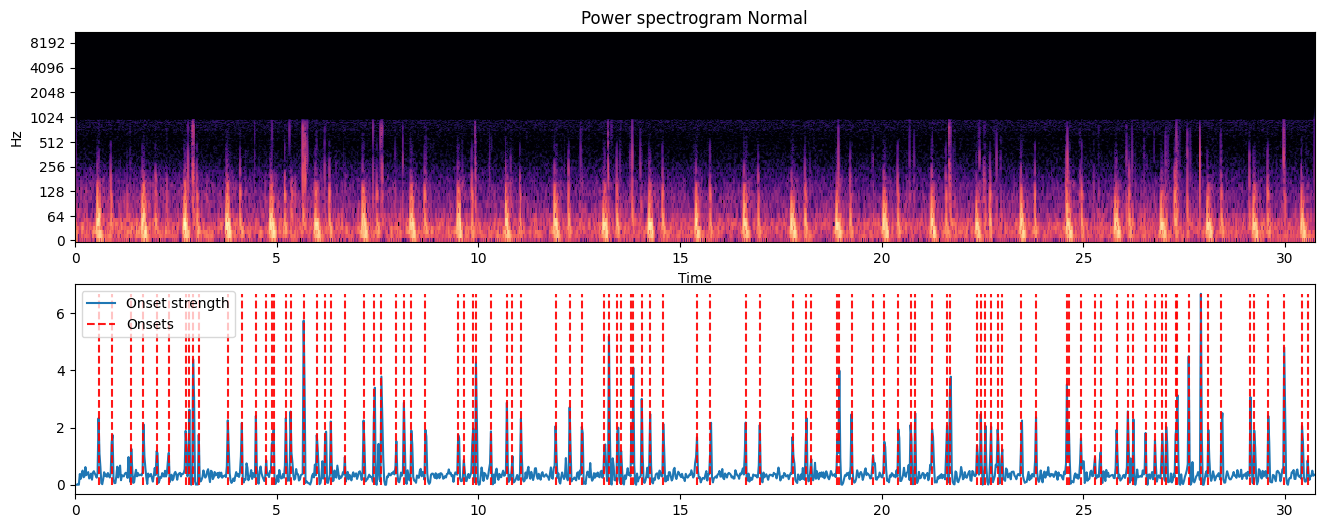

In [37]:
# visualize it
D_abnormal = np.abs(librosa.stft(y_abnormal))
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(D_abnormal, ref=np.max),x_axis='time', y_axis='log')
plt.title('Power spectrogram Normal')
plt.subplot(2, 1, 2, sharex=ax1)

plt.plot(times_abnormal, o_env_abnormal, label='Onset strength')
plt.vlines(times_abnormal[onset_frames_abnormal], 0, o_env_abnormal.max(), color='r', alpha=0.9,linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)

onset_backtrack

Backtrack detected onset events to the nearest preceding local minimum of an energy function. This function can be used to roll back the timing of detected onsets from a detected peak amplitude to the preceding minimum. This is most useful when using onsets to determine slice points for segmentation

In [38]:
oenv_abnormal = librosa.onset.onset_strength(y=y_abnormal, sr=sr_abnormal)
# Detect events without backtracking
onset_raw_abnormal = librosa.onset.onset_detect(onset_envelope=oenv_abnormal, backtrack=False)
# Backtrack the events using the onset envelope
onset_bt_abnormal = librosa.onset.onset_backtrack(onset_raw_abnormal, oenv_abnormal)
# Backtrack the events using the RMS values
rms_abnormal = librosa.feature.rms(S=np.abs(librosa.stft(y=y_abnormal)))
onset_bt_abnormal_rms = librosa.onset.onset_backtrack(onset_raw_abnormal, rms_abnormal[0])

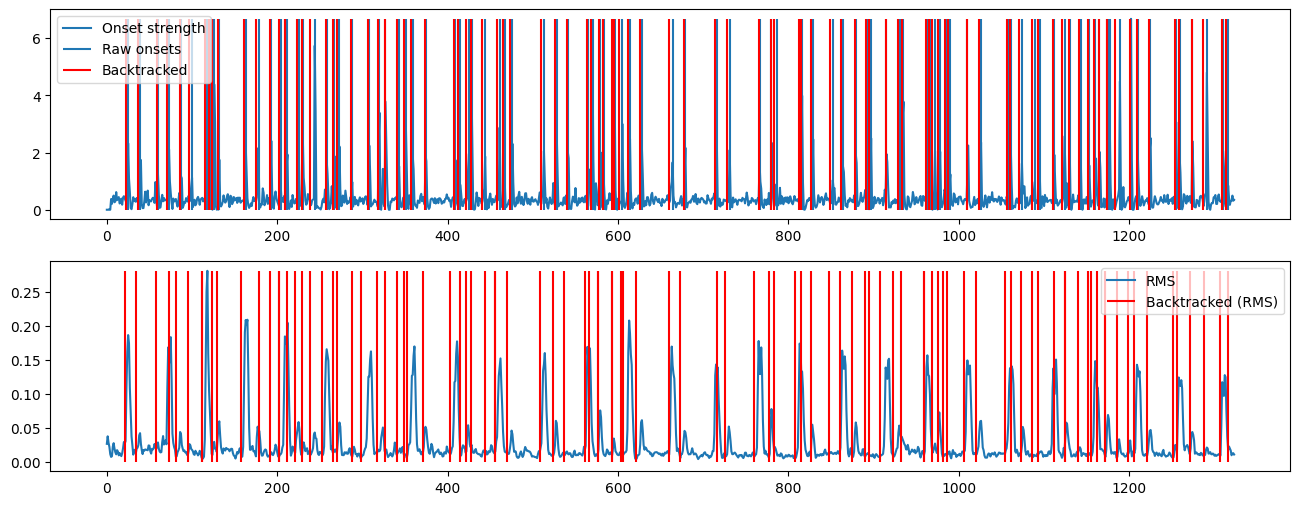

In [39]:
# Plot the results
plt.figure(figsize=(16, 6))
plt.subplot(2,1,1)
plt.plot(oenv_abnormal, label='Onset strength')
plt.vlines(onset_raw_abnormal, 0, oenv_abnormal.max(), label='Raw onsets')
plt.vlines(onset_bt_abnormal, 0, oenv_abnormal.max(), label='Backtracked', color='r')
plt.legend(frameon=True, framealpha=0.75)
plt.subplot(2,1,2)
plt.plot(rms_abnormal[0], label='RMS')
plt.vlines(onset_bt_abnormal_rms, 0, rms_abnormal.max(), label='Backtracked (RMS)', color='r')
plt.legend(frameon=True, framealpha=0.75)

onset strength

Compute a spectral flux onset strength envelope. Onset strength at time t is determined by: mean_f max(0, S[f, t] - ref_S[f, t - lag]) where ref_S is S after local max filtering along the frequency axis [1]. By default, if a time series y is provided, S will be the log-power Mel spectrogram.

C:\Users\dianr\AppData\Local\Temp\ipykernel_39268\4234079639.py:16: RuntimeWarning: invalid value encountered in divide
  plt.plot(times_abnormal, 1+ (onset_env_abnormal/onset_env_abnormal.max()), alpha=0.8,label='Median (custom mel)')


Text(0.5, 1.0, 'Sub-band onset strength')

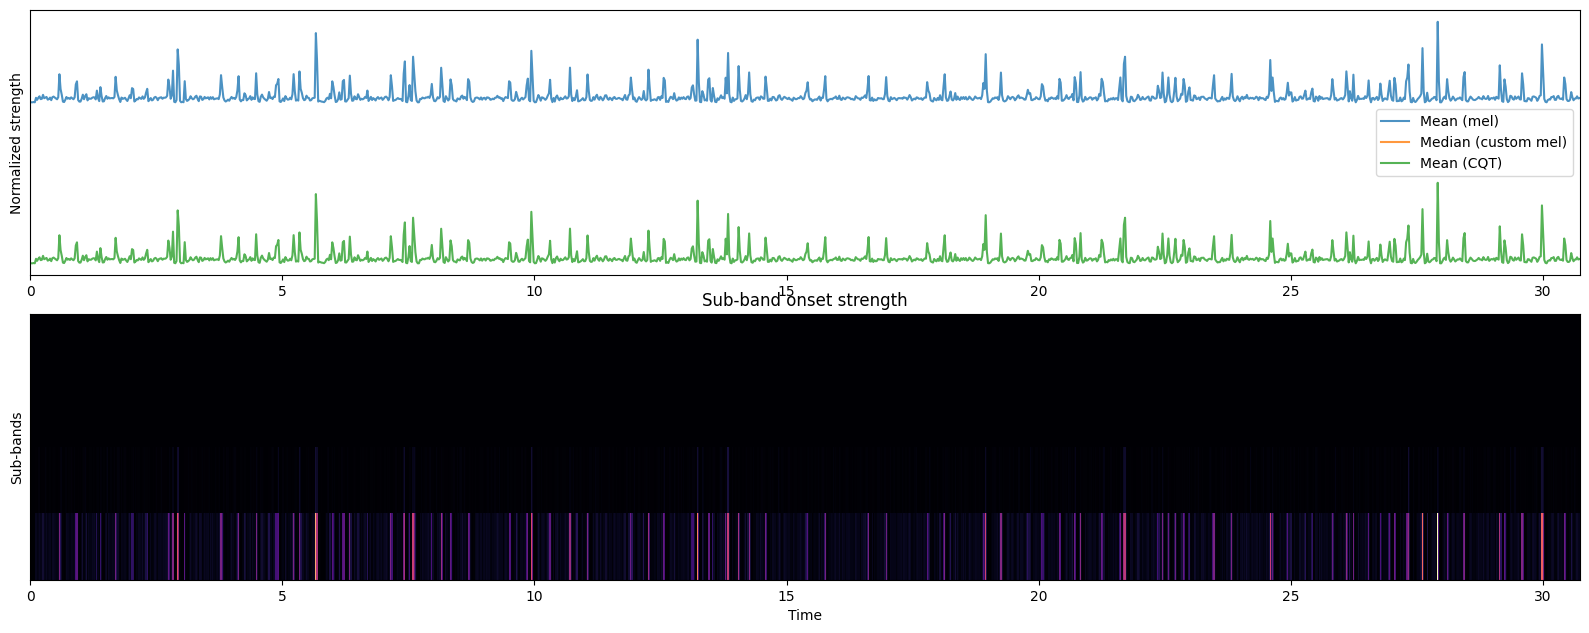

In [40]:
D_abnormal = np.abs(librosa.stft(y_abnormal))
times_abnormal = librosa.frames_to_time(np.arange(D_abnormal.shape[1]))

plt.figure(figsize=(16, 6))
#ax1 = plt.subplot(2, 1, 1)
#librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),y_axis='log', x_axis='time')
#plt.title('Power spectrogram')

# Construct a standard onset function
onset_env_abnormal = librosa.onset.onset_strength(y=y_abnormal, sr=sr_abnormal)
plt.subplot(2, 1, 1, sharex=ax1)
plt.plot(times_abnormal, 2 + onset_env_abnormal / onset_env_abnormal.max(), alpha=0.8,label='Mean (mel)')

# median
onset_env_abnormal = librosa.onset.onset_strength(y=y_abnormal, sr=sr_abnormal, aggregate=np.median,fmax=8000, n_mels=256)
plt.plot(times_abnormal, 1+ (onset_env_abnormal/onset_env_abnormal.max()), alpha=0.8,label='Median (custom mel)')

# Constant-Q spectrogram instead of Mel
onset_env_abnormal = librosa.onset.onset_strength(y=y_abnormal, sr=sr_abnormal)
plt.plot(times_abnormal, onset_env_abnormal / onset_env_abnormal.max(), alpha=0.8,label='Mean (CQT)')
plt.legend(frameon=True, framealpha=0.75)
plt.ylabel('Normalized strength')
plt.yticks([])
plt.axis('tight')
plt.tight_layout()

onset_subbands_abnormal = librosa.onset.onset_strength_multi(y=y_abnormal, sr=sr_abnormal, channels=[0, 32, 64, 96, 128])
#plt.figure(figsize=(16, 6))
plt.subplot(2, 1, 2)
librosa.display.specshow(onset_subbands_abnormal, x_axis='time')
plt.ylabel('Sub-bands')
plt.title('Sub-band onset strength')

## VISUALISASI GABUNGAN DATA NORMAL DAN ABNORMAL

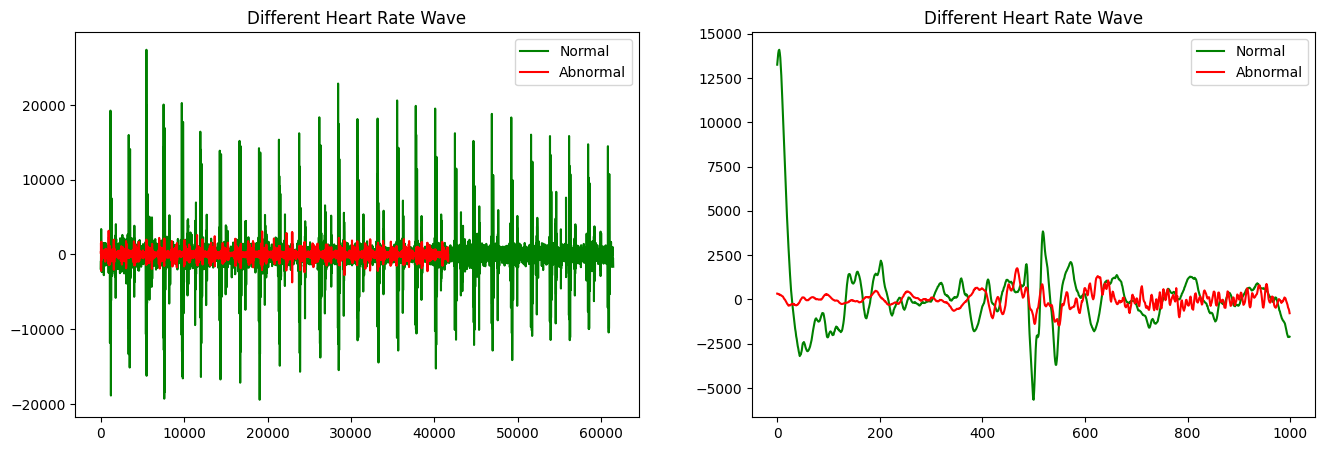

In [41]:
fig, axes = plt.subplots(nrows = 1, ncols =2, figsize=(16,5))

axes[0].plot(normal_data, color ="g")
axes[0].plot(abnormal_data, color ="r")
axes[0].set_title("Different Heart Rate Wave")
axes[0].legend(['Normal','Abnormal'])


axes[1].plot(normal_data[3500:4500], color ="g")
axes[1].plot(abnormal_data[3500:4500], color ="r")
axes[1].set_title("Different Heart Rate Wave")
axes[1].legend(['Normal','Abnormal'])




# PREPROCESSING

In [42]:
# sound feature : MFCC untuk ini merupakan fitur paling sukses yang digunakan di bidang audio processing

# normal
y_normal, sr = librosa.load(normal_file)
mfccs_normal = librosa.feature.mfcc(y=y_normal, sr=sr_normal)

y_abnormal, sr = librosa.load(abnormal_file)
mfccs_abnormal = librosa.feature.mfcc(y=y_abnormal, sr=sr_abnormal)



print("DATA NORMAL: ")
print (mfccs_normal)

print("DATA TIDAKNORMAL: ")
print (mfccs_normal)


print(len(mfccs_abnormal))

DATA NORMAL: 
[[-3.6199817e+02 -4.0791089e+02 -4.6387448e+02 ... -4.7108270e+02
  -4.2918713e+02 -4.0464215e+02]
 [ 1.3202686e+02  1.1298586e+02  6.1993690e+01 ...  5.2286877e+01
   1.0178134e+02  1.2669387e+02]
 [ 3.4862339e+01  5.2772869e+01  4.7999245e+01 ...  3.9561752e+01
   6.5499680e+01  7.0203629e+01]
 ...
 [ 5.4677906e+00  7.6149244e+00  8.3432770e+00 ...  6.5417995e+00
   2.2483215e+00  6.4678156e-01]
 [ 3.9628425e+00  5.2620225e+00  4.5938778e+00 ...  4.9711366e+00
   1.2129276e+00 -4.1501626e-01]
 [ 3.0085907e+00  3.9241717e+00  8.2530868e-01 ...  4.6719303e+00
   2.1573281e+00  9.5276284e-01]]
DATA TIDAKNORMAL: 
[[-3.6199817e+02 -4.0791089e+02 -4.6387448e+02 ... -4.7108270e+02
  -4.2918713e+02 -4.0464215e+02]
 [ 1.3202686e+02  1.1298586e+02  6.1993690e+01 ...  5.2286877e+01
   1.0178134e+02  1.2669387e+02]
 [ 3.4862339e+01  5.2772869e+01  4.7999245e+01 ...  3.9561752e+01
   6.5499680e+01  7.0203629e+01]
 ...
 [ 5.4677906e+00  7.6149244e+00  8.3432770e+00 ...  6.5417995e+00

# TRAIN MODEL

## SPLIT DATA

In [43]:
# parent folder of sound files
INPUT_DIR="dataset/training-a/wav"
# 16 KHz
SAMPLE_RATE = 16000
# seconds
MAX_SOUND_CLIP_DURATION=12  

In [44]:
save_dataset = []
for i in range(len(df)):
    save_dataset.append("a")


df['Dataset'] = save_dataset

In [45]:
df.head()

,Data,Column2,Label,file_wav,Dataset
0,a0001,1,abnormal,a0001.wav,a
1,a0002,1,abnormal,a0002.wav,a
2,a0003,1,abnormal,a0003.wav,a
3,a0004,1,abnormal,a0004.wav,a
4,a0005,1,abnormal,a0005.wav,a


In [46]:
df.describe()

,Column2
count,409.000000
mean,0.427873
std,0.904946
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [47]:
#get all unique labels
label_classes=df.Label.unique()

print("Number of training examples=", df.shape[0], "  Number of classes=", len(df.Label.unique()))
print (label_classes)

Number of training examples= 409   Number of classes= 2
['abnormal' 'normal']


Min samples per category =  117
Max samples per category =  292


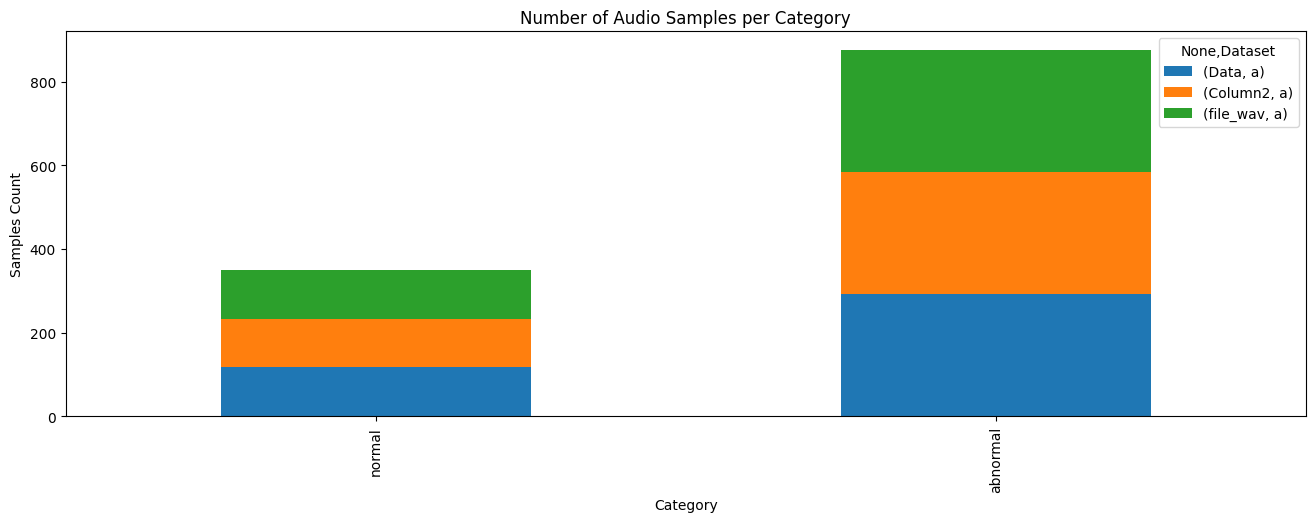

In [48]:
# visualize data distribution by category
category_group = df.groupby(['Label', 'Dataset']).count()
plot = category_group.unstack().reindex(category_group.unstack().sum(axis=1).sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,5))
plot.set_xlabel("Category")
plot.set_ylabel("Samples Count")

print('Min samples per category = ', min(df.Label.value_counts()))
print('Max samples per category = ', max(df.Label.value_counts()))

In [49]:
print("Number of training examples=", df.shape[0], "  Number of classes=", len(df.Label.unique()))

Number of training examples= 409   Number of classes= 2


In [50]:
def audio_norm(data):
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data-min_data)/(max_data-min_data+0.0001)
    return data-0.5

# get audio data without padding highest qualify audio
def load_file_data_without_change(folder,file_names, duration=3, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0) 
        except Exception as e:
            print("Error encountered while parsing file: ", file)
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data


# get audio data with a fix padding may also chop off some file
def load_file_data (folder,file_names, duration=12, sr=16000):
    input_length=sr*duration
    # function to load files and extract features
    # file_names = glob.glob(os.path.join(folder, '*.wav'))
    data = []
    for file_name in file_names:
        try:
            sound_file=folder+file_name
            print ("load file ",sound_file)
            # use kaiser_fast technique for faster extraction
            X, sr = librosa.load( sound_file, sr=sr, duration=duration,res_type='kaiser_fast') 
            dur = librosa.get_duration(y=X, sr=sr)
            # pad audio file same duration
            if (round(dur) < duration):
                print ("fixing audio lenght :", file_name)
                y = librosa.util.fix_length(X, input_length)                
            #normalized raw audio 
            # y = audio_norm(y)            
            # extract normalized mfcc feature from data
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40).T,axis=0)             
        except Exception as e:
            print("Error encountered while parsing file: ", file)        
        feature = np.array(mfccs).reshape([-1,1])
        data.append(feature)
    return data

In [51]:
# simple encoding of categories, limited to 3 types
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Map label text to integer
CLASSES = ['abnormal','normal']

NB_CLASSES=len(CLASSES)

# Map integer value to text labels
label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
# map integer to label text
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)


convert_label = []
for i in df['Label']:
    if i == "normal":
        convert_label.append("1")
    elif i == "abnormal":
        convert_label.append("0")


{'abnormal': 0, 'normal': 1}
 
{0: 'abnormal', 1: 'normal'}


In [52]:
df['conv_label'] = convert_label
df

,Data,Column2,Label,file_wav,Dataset,conv_label
0,a0001,1,abnormal,a0001.wav,a,0
1,a0002,1,abnormal,a0002.wav,a,0
2,a0003,1,abnormal,a0003.wav,a,0
3,a0004,1,abnormal,a0004.wav,a,0
4,a0005,1,abnormal,a0005.wav,a,0
...,...,...,...,...,...,...
404,a0405,-1,normal,a0405.wav,a,1
405,a0406,-1,normal,a0406.wav,a,1
406,a0407,-1,normal,a0407.wav,a,1
407,a0408,-1,normal,a0408.wav,a,1


In [53]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df['file_wav'], df['conv_label'], test_size=0.3, random_state=42)

print("Jumlah Data Train : ", len(X_train))
print("Jumlah Data Test : ", len(X_test))


Jumlah Data Train :  286
Jumlah Data Test :  123


In [54]:
y_train

291    0
323    0
261    0
334    0
109    0
      ..
71     0
106    0
270    1
348    0
102    0
Name: conv_label, Length: 286, dtype: object

In [55]:
# One-Hot encoding for classes

# shuffle - whether or not to shuffle the data before splitting. If shuffle=False then stratify must be None.
# random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

seed = 1000

y_train = np.array(keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(keras.utils.to_categorical(y_test, len(CLASSES)))

In [56]:
for i in file:
    file_save ="plot/"+"plot_"+ i +".png"
    file_input=name_folder+i+".wav"
    Fs, aud = wavfile.read(file_input)
    # select left channel only
    # trim the first 125 seconds
    # print(Fs)
    # print(aud[:Fs])
    first = aud[:Fs]

    powerSpectrum, frequenciesFound, time, imageAxis = plt.specgram(first, Fs=Fs)
    # plt.show(imageAxis)
    # print(imageAxis)
    # print(powerSpectrum)
    # print(frequenciesFound)
    # print(time)
        
    plt.savefig(file_save)

NameError: name 'file' is not defined

In [ ]:
for i in file:
    file_save ="plot/"+"plot freq_"+ i +".png"
    file_input=name_folder+i+".wav"
    wav_obj = wave.open(file_input, 'rb')

    sample_freq = wav_obj.getframerate()
    # print(sample_freq)
    n_samples = wav_obj.getnframes()
    # print(n_samples)
    t_audio = n_samples/sample_freq
    # print(t_audio)
    n_channels = wav_obj.getnchannels()
    # print(n_channels)
    signal_wave = wav_obj.readframes(n_samples)
    # print(signal_wave)
    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    l_channel = signal_array[0::]
    # r_channel = signal_array[1::2]
    times = np.linspace(0, n_samples/sample_freq, num=n_samples)
    plt.plot(times, l_channel)
        
    plt.savefig(file_save)

NameError: name 'file' is not defined